<a href="https://colab.research.google.com/github/PMatthaei/pymarl-results/blob/master/visualize_pymarl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Visualization of PyMARL experiments

This notebook visualizes results of experiments conducted on PyMARL.

Main repository: https://github.com/oxwhirl/pymarl

Fork: https://github.com/PMatthaei/pymarl

Results repository: https://github.com/PMatthaei/pymarl-results


In [1]:
!git clone https://github.com/PMatthaei/pymarl-results.git

Cloning into 'pymarl-results'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 919 (delta 20), reused 57 (delta 4), pack-reused 839
Receiving objects: 100% (919/919), 52.87 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (257/257), done.


In [2]:
!mkdir /content/plots

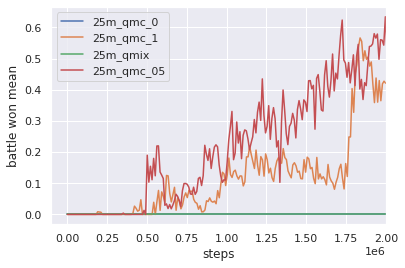

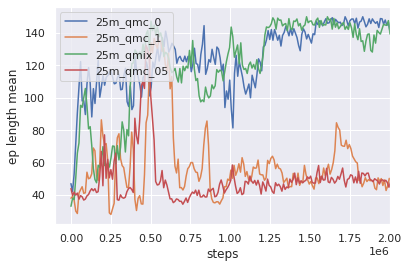

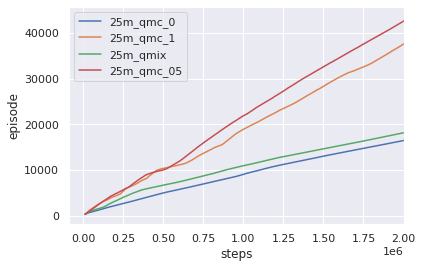

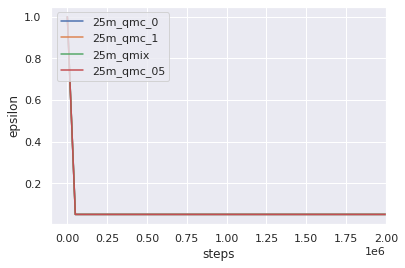

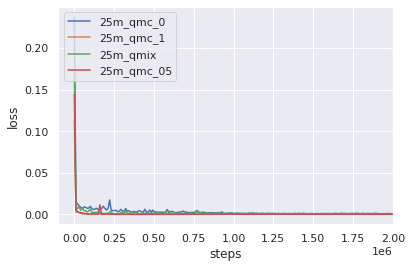

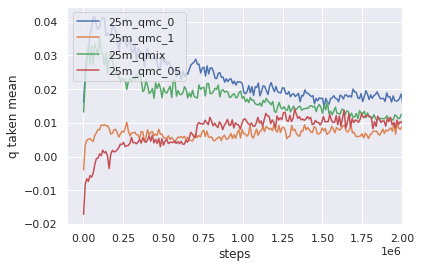

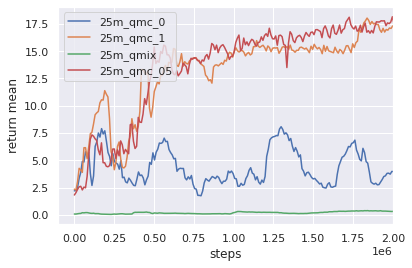

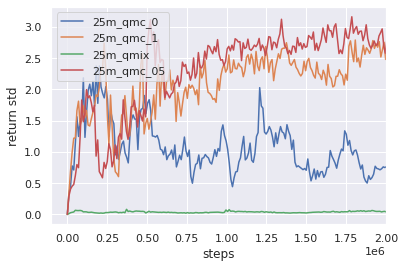

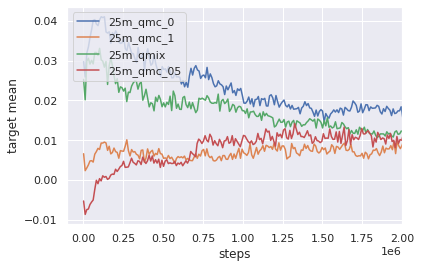

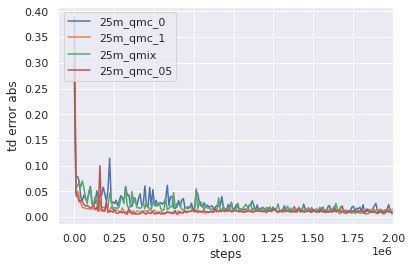

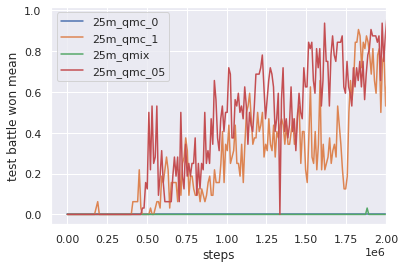

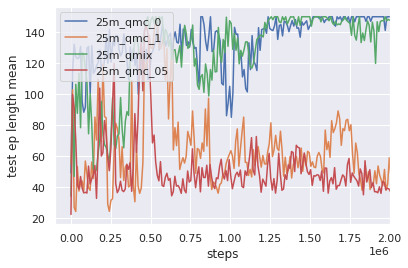

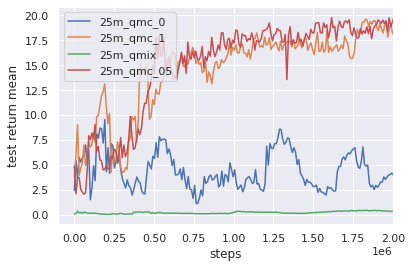

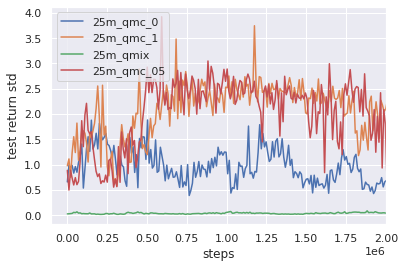

Zipping: q_taken_mean.png
Adding: target_mean.png
Adding: loss.png
Adding: battle_won_mean.png
Adding: return_std.png
Adding: episode.png
Adding: test_return_std.png
Adding: test_ep_length_mean.png
Adding: test_battle_won_mean.png
Adding: td_error_abs.png
Adding: return_mean.png
Adding: epsilon.png
Adding: ep_length_mean.png
Adding: test_return_mean.png
Adding: q_taken_mean.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#@title Choose your experiments { run: "auto" }

#@markdown Choose algorithms
qmix = True #@param {type:"boolean"}
qmc = True #@param {type:"boolean"}
vdn = False #@param {type:"boolean"}
vdnc = False #@param {type:"boolean"}
iql = False #@param {type:"boolean"}
coma = False #@param {type:"boolean"}
qtran = False #@param {type:"boolean"}

#@markdown Choose environments
three_marines = False #@param {type:"boolean"}
eight_marines = False #@param {type:"boolean"}
twentyfive_marines = True #@param {type:"boolean"}
three_stalkers_five_zealots = False #@param {type:"boolean"}

# Fetch form data
envs = []
if three_marines: envs.append('3m')
if eight_marines: envs.append('8m')
if twentyfive_marines: envs.append('25m')
if three_stalkers_five_zealots: envs.append('3s5z')

algos = []
if qmix: algos.append('qmix')
if qmc: algos.append('qmc')
if vdn: algos.append('vdn')
if vdnc: algos.append('vdc')
if iql: algos.append('iql')
if coma: algos.append('coma')
if qtran: algos.append('qtran')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.signal import lfilter
from pathlib import Path
from google.colab import files
import os
import glob
from zipfile import ZipFile
import os
from os.path import basename

sns.set()

plot_data = {}
metrics = []

def extract_plot_data():
  # Fetch all paths to info.json of every commited experiment
  for path in Path('/content/pymarl-results').rglob('*info*.json'):
    # Extract label from path
    label = extract_label(path, algos+envs)

    # If the path corresponds to a env or an algo we want to plot 
    if is_algo(path, algos) and is_env(path, envs):
      # Read json
      with open(path) as json_file:
          data = json.load(json_file)
          for metric in data:
            # Transposed corresponds to xs values. We identify metrics by ys
            if '_T' not in metric:
              # If we have not already seen this metric in a json -> add to plots
              if metric not in metrics:
                metrics.append(metric)

              # Get data for this metric and the current experiment
              transposed_identifier = metric+'_T'
              xs = data[transposed_identifier]
              ys = data[metric]

              # Save the experiment data in the plot dict and provide label
              if metric in plot_data:
                plot_data[metric].append((xs, ys, label))
              else:
                plot_data[metric] = []
                plot_data[metric].append((xs, ys, label))
                
# Smoothing parameters
n = 30  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
not_smooth = ['epsilon', 'td_error_abs', 'loss']
def plot():
  for metric in metrics:
    # Exclude for now since weird jsons are returned
    if metric == 'grad_norm':
      continue

    for i, data in enumerate(plot_data[metric]):
      # If plot data is hidden in a dict property 'value' -> unpack
      ys = list(map(lambda x: x['value'] if isinstance(x,dict) else x, data[1]))
      xs = data[0]

      # Confidence interval if we have multiple values
      sns.lineplot(x=xs, y=ys, ci=95, label=data[2])

      plt.xlabel('steps')
      plt.xlim(right=2000000) # Experiments end at 2 million steps
      metric_label = metric.replace('_', ' ')
      plt.ylabel(metric_label)

    plt.legend(loc='upper left')
    plt.savefig('/content/plots/'+metric+'.png')
    plt.show()

def is_env(path, envs):
  if len(envs) == 0:
    return True
  # Test for all paths if they correspond to a selected environment
  return any(env in str(path) for env in envs)

def is_algo(path, algos):
  if len(algos) == 0:
    return True
  # Test for all paths if they correspond to a selected algorithm
  return any(algo in str(path) for algo in algos)

def extract_label(path, search):
  # Match folder name which will serve as label
  return re.search(".*(results/)(.*)(/source).*",str(path))[2]

# main 
extract_plot_data()
plot()

# Delete previous zip to prevent rezipping
if os.path.isfile("/content/plots.zip"):
  os.remove("/content/plots.zip")

# Create a ZipFile
with ZipFile('plots.zip', 'w') as zip:
  # Iterate over all the files in directory
  print("Zipping:", filename)
  for folderName, subfolders, filenames in os.walk("/content/plots/"):
    for filename in filenames:
      print("Adding:", filename)
      #create complete filepath of file in directory
      filePath = os.path.join(folderName, filename)
      # Add file to zip
      zip.write(filePath, basename(filePath))
  assert zip.testzip() is None



# Download
files.download("/content/plots.zip")

# Clear plots
files = glob.glob('/content/plots/*')
for f in files:
    os.remove(f)